<a href="https://colab.research.google.com/github/dhawalnegi1/EVA/blob/master/Project-4/SECOND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second network

**Improvement added are** 
1. Batch Normalisation
2. Validation test with each epoch
3. Large Size convolution

Installing the keras library if not already installed and then importing it.

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing the numpy library to be used later, and importing the models and differnt functions of keras library , and the mnist dataset.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

This cell is for loading the training as well as testing dataset in the specific lists. The dataset is download from and amazon storage bucket and is loaded in the defined variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The shape (no. of images and size of the image) of the training dataset is printed. We import pyplot package from matplotlib library to plot the image in the notebook. the next line is a magic function ."%" is inline magic function used to plot in the notebook instead of creating new window. we are showing the first image fron the 60000 in thetraining dataset.

(60000, 28, 28)


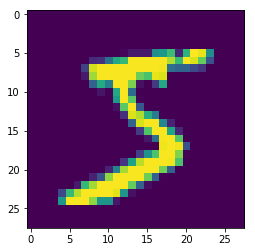

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In this cell, the test as well as training dataset's shape is modified using reshape function because the dataset loaded was 2 dimensional vector and for convolution we require 3-d vector(i.e height x width of image plus no of channels). In reshape function we are defining no. of input channel as 1.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In this cell, we change the datatype of the dataset to float and then the pixel value of each image in training and testing datasets are normalized(i.e. between 0 & 1).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In this cell, we are printing the classes of 1st 10 images of training dataset,

In [7]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In, the cell we are coverting the y_train and y_test data into categorical data(i.e for each image there is array of 10 values representing either 0 or 1, telling image belong to which class). Only 1 out of 10 values can be 1. We using numpy to perform this action.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In this cell, we are printing the categorical value of 1st 10 images of training dataset.

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

This is the cell where are model and its layers are defined. We are defining sequential model.
Initial input to the model is (28x28)x1.

In [14]:
from keras.layers import Activation, MaxPooling2D, BatchNormalization

model = Sequential() 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # input=(28x28)      receptive field = 3x3
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))                        # input=(26x26)     receptive field = 5x5
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu'))                       # input=(24x24)     receptive field = 7x7
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))                                    # input=(22x22)    receptive field = 14x14
model.add(Convolution2D(8,1))
model.add(BatchNormalization())
model.add(Convolution2D(8, 3, 3, activation='relu'))                       # input=(11x11)    receptive field = 16x16
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))                       # input=(9x9)    receptive field = 18x18
model.add(BatchNormalization())
model.add(Convolution2D(32, 7, 7, activation='relu'))  # input=(7x7)    receptive field = 20x20
model.add(Convolution2D(10,1))
model.add(Flatten())                                                         # input=(1x1)   receptive field = 26x626
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu")`


Here we compile our model and configure its learning process . we pass 3 arguments,i.e. optimizer, loss function and metrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In this cell, we train our model on training dataset , by dividing it into batches of size 32 each. The model is trained 10 times on dataset. i.e. it will go over all images 10 times(epochs).

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 427us/step - loss: 0.1205 - acc: 0.9624 - val_loss: 0.0422 - val_acc: 0.9858
Epoch 2/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0478 - acc: 0.9849 - val_loss: 0.0474 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.0354 - acc: 0.9887 - val_loss: 0.0397 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0271 - acc: 0.9914 - val_loss: 0.0360 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0245 - acc: 0.9919 - val_loss: 0.0409 - val_acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.0197 - acc: 0.9937 - val_loss: 0.0273 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.

In this cell we evaluate our trained model whose output will be accuracy and loss on the test dataset.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the score calculated in previous cell

In [18]:
print(score)

[0.03671587141047994, 0.9886]


Here we are creating a new list y_pred and initilizing it with prediction values of each test image by our model in categorical form.

In [0]:
y_pred = model.predict(X_test)

printing the prediction and actual class of first 10 test images

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[1.39036216e-09 4.40328968e-10 7.06256220e-10 2.91376284e-10
  2.34329911e-09 9.57960518e-14 1.32387908e-17 1.00000000e+00
  2.08429346e-12 6.88362839e-11]
 [5.50561333e-12 1.04423503e-09 1.00000000e+00 1.09174896e-13
  1.38145368e-13 2.95265403e-19 1.14663205e-12 1.01715517e-15
  4.66075746e-13 2.72467404e-17]
 [1.85955730e-11 9.99999881e-01 1.77275875e-10 1.78602133e-11
  1.90882865e-08 7.04663305e-09 1.09097940e-08 1.57490145e-08
  2.30066490e-08 5.62765692e-08]
 [1.00000000e+00 1.03945180e-13 2.48933114e-11 2.58892910e-15
  1.63984516e-12 2.57862330e-12 4.54627447e-09 9.24791588e-14
  6.48346585e-11 1.45466823e-13]
 [2.39512941e-20 2.10210933e-18 1.06339506e-14 5.62469044e-21
  1.00000000e+00 1.04523408e-19 4.59291570e-19 2.74801270e-18
  7.68756600e-15 1.10768394e-09]
 [2.29268138e-09 9.99999523e-01 2.90542168e-09 4.18077769e-12
  2.50628478e-08 1.66649194e-11 1.77102690e-11 4.55328035e-07
  1.29024225e-09 1.12096759e-08]
 [3.27797346e-15 6.72522095e-15 1.21112937e-11 1.05921248e

Batch normalisation helped in tunning the values between a range and validation test gave us intitution about model after every epoch. Dropout can be used further to make model learn more hard and we can decrease no. of kernels in each layer to atttain the target of 15k.